In [1]:
import os, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

import warnings
warnings.filterwarnings("ignore")

import evals.embed_evals as evals
import pickle
import utils
y_train = np.array([0]*80+[1]*80)
y_valid = np.array([0]*20+[1]*20)

## clf dwac

TSNEing


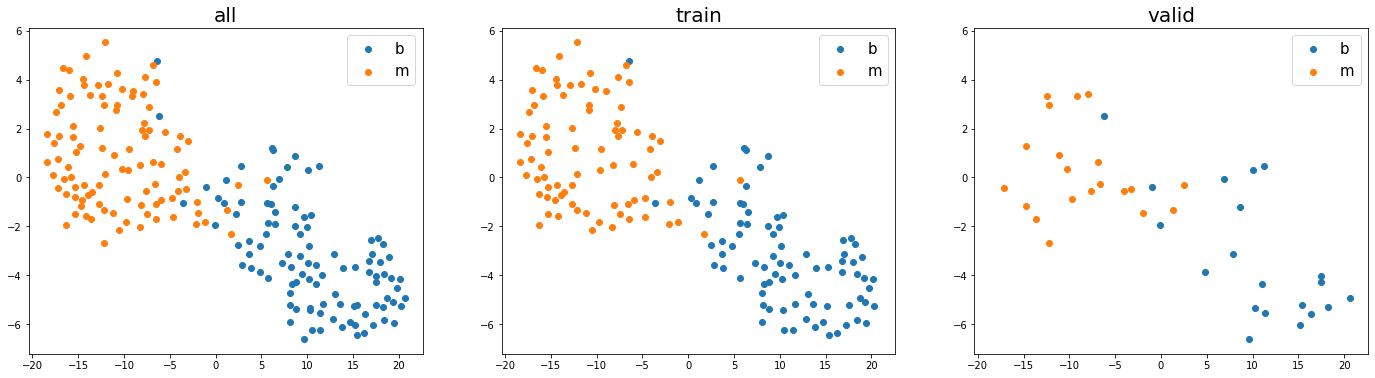

In [6]:
train_path = "/net/scratch/hanliu-shared/data/bm/embs/dwac_train_emb10.merged10.pkl"
valid_path = "/net/scratch/hanliu-shared/data/bm/embs/dwac_valid_emb10.merged10.pkl"
_, _, y_train, x_train = pickle.load(open(train_path, "rb"))
_, _, y_valid, x_valid = pickle.load(open(valid_path, "rb"))
data = x_train, y_train, x_valid, y_valid
x_train.shape, x_valid.shape
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])

In [11]:
acc = evals.bm_eval_lpips(x_train, x_valid)

100%|██████████| 508800/508800 [00:12<00:00, 39562.70it/s]

train_triplet_acc: 0.5307260568426081
valid_triplet_acc: 0.5662955465587044
val2train_triplet_acc: 0.5449213836477987
knn_acc: 0.85
knn_auc: 0.8500000000000001


In [7]:
acc = evals.bm_eval_human(x_train, y_train, x_valid, y_valid)

human triplet evals:
train_triplet_acc: 0.6608391608391608
valid_triplet_acc: 0.6811594202898551
knn_acc: 0.85
knn_auc: 0.8500000000000001


## ResNET

TSNEing


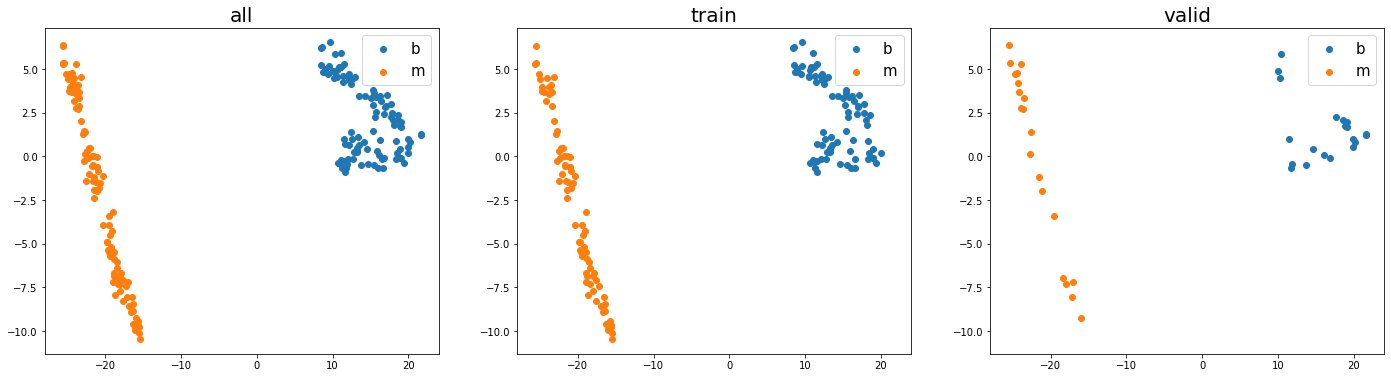

In [5]:
x_train = pickle.load(open("embeds/bm/resn_train_emb10.pkl","rb"))
x_valid = pickle.load(open("embeds/bm/resn_valid_emb10.pkl","rb"))
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])

In [3]:
acc = evals.bm_eval_lpips(x_train, y_train, x_valid, y_valid)

lpips triplet evals:
train_triplet_acc: 0.5277958562216384
valid_triplet_acc: 0.5346153846153846
val2train_triplet_acc: 0.5491450471698113
knn_acc: 1.0
knn_auc: 1.0


In [4]:
acc = evals.bm_eval_human(x_train, y_train, x_valid, y_valid)

human triplet evals:
train_triplet_acc: 0.6748251748251748
valid_triplet_acc: 0.6956521739130435
knn_acc: 1.0
knn_auc: 1.0


## triplet net eval

In [4]:
train_embeds = pickle.load(open("embeds/bm/lpips/TN_train_emb10.pkl","rb"))
valid_embeds = pickle.load(open("embeds/bm/lpips/TN_valid_emb10.pkl","rb"))
acc = evals.bm_eval_lpips(train_embeds, valid_embeds)
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])

human triplet evals:
train_triplet_acc: 0.9965034965034965
valid_triplet_acc: 0.8115942028985508
knn_acc: 0.95
knn_auc: 0.9500000000000001
TSNEing


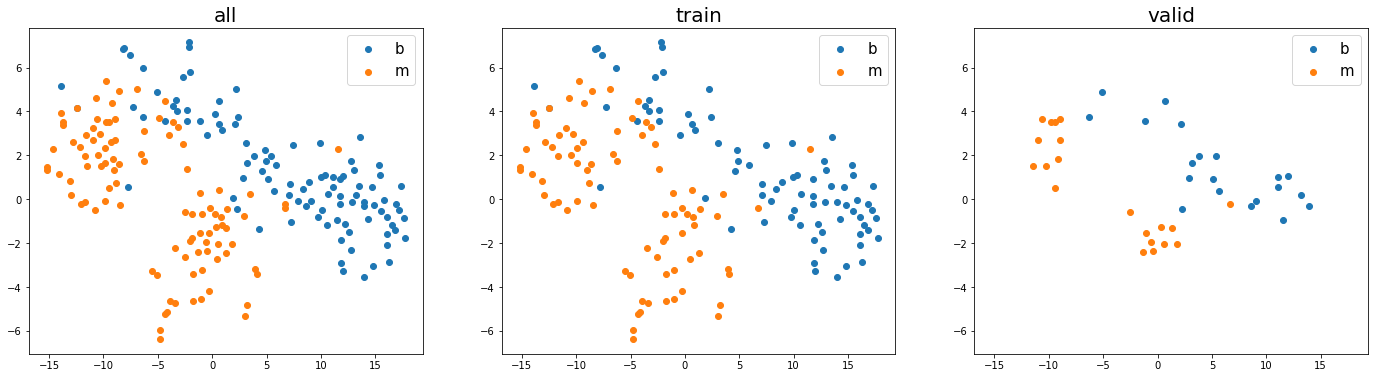

In [2]:
x_train = pickle.load(open("embeds/bm/human/TN_train_emb10.pkl","rb"))
x_valid = pickle.load(open("embeds/bm/human/TN_valid_emb10.pkl","rb"))
acc = evals.bm_eval_human(x_train, y_train, x_valid, y_valid)
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])

## MTL eval

lpips triplet evals:
train_triplet_acc: 0.8828352639121089
valid_triplet_acc: 0.8282388663967611
val2train_triplet_acc: 0.8595833333333334
knn_acc: 0.95
knn_auc: 0.95
TSNEing


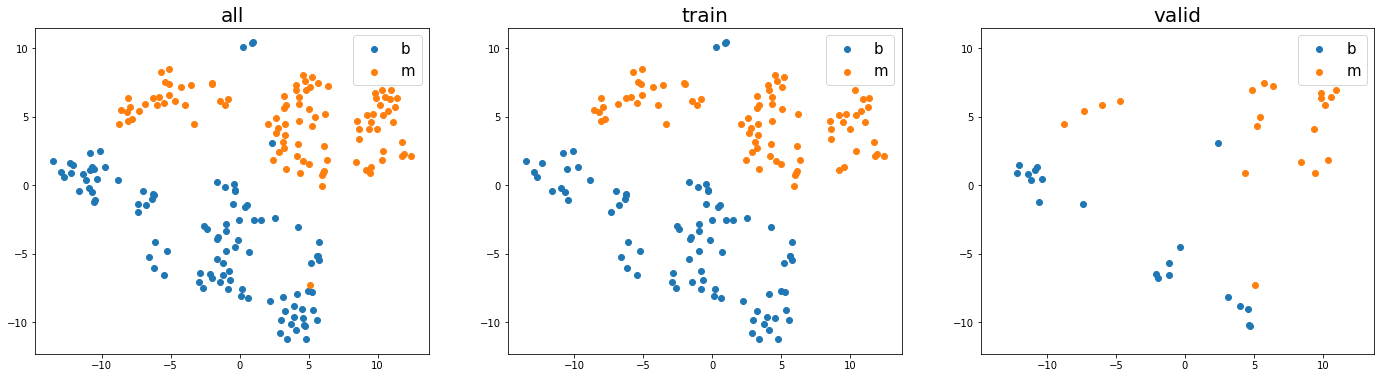

In [3]:
x_train = pickle.load(open("embeds/bm/lpips/MTL.BCETN_train_emb10.pkl","rb"))
x_valid = pickle.load(open("embeds/bm/lpips/MTL.BCETN_valid_emb10.pkl","rb"))
acc = evals.bm_eval_lpips(x_train, y_train, x_valid, y_valid)
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])

human triplet evals:
train_triplet_acc: 1.0
valid_triplet_acc: 0.8985507246376812
knn_acc: 0.95
knn_auc: 0.95
TSNEing


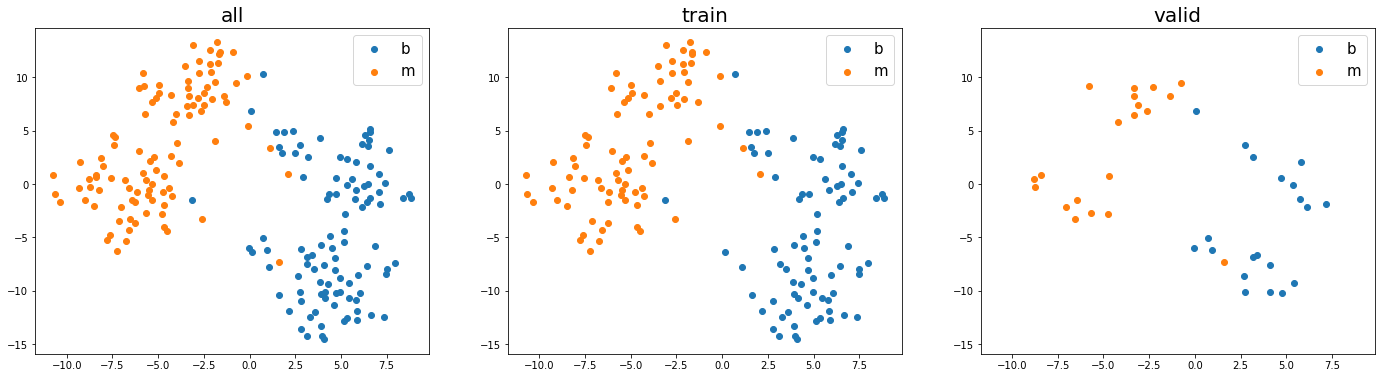

In [4]:
x_train = pickle.load(open("embeds/bm/human/MTL.BCETN_train_emb10.pkl","rb"))
x_valid = pickle.load(open("embeds/bm/human/MTL.BCETN_valid_emb10.pkl","rb"))
acc = evals.bm_eval_human(x_train, y_train, x_valid, y_valid)
_ = utils.vis_data(x_train, y_train, x_valid, y_valid, "", ["b","m"])